In [1]:
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px
import gc
import folium

### csv to parquet 데이터 불러오기

In [2]:
PRJ_DIR = os.getcwd()
DATA_DIR = os.path.join(PRJ_DIR, 'data')

print(PRJ_DIR)
print(DATA_DIR)

C:\Users\user\Desktop\코딩 note\m-project\이재영
C:\Users\user\Desktop\코딩 note\m-project\이재영\data


In [3]:
def csv_to_parquet(csv_name, save_name):
    df = pd.read_csv(os.path.join(DATA_DIR, f'{csv_name}.csv'))
    df.to_parquet(os.path.join(DATA_DIR, f'{save_name}.parquet'))
    del df
    gc.collect()
    print(save_name, 'Done.')

In [4]:
csv_to_parquet('train', 'train')

train Done.


In [5]:
csv_to_parquet('test', 'test')

test Done.


In [6]:
train = pd.read_parquet(os.path.join(DATA_DIR, 'train.parquet'))
test = pd.read_parquet(os.path.join(DATA_DIR, 'test.parquet'))

In [7]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


- 1. 데이터 훑어보기

In [8]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [8]:
train['multi_linked']

0          0
1          0
2          0
3          0
4          0
          ..
4701212    0
4701213    0
4701214    0
4701215    0
4701216    0
Name: multi_linked, Length: 4701217, dtype: int64

# 범주형 데이터 확인 

In [9]:
train['base_hour'].value_counts()

15    214541
13    214297
14    214182
12    211833
19    209870
11    208515
16    208420
17    208377
18    207500
10    206316
9     205327
20    205059
21    203585
8     201875
22    200629
7     199061
6     189418
23    184229
1     182353
5     181128
2     169322
4     165284
3     155938
0     154158
Name: base_hour, dtype: int64

In [10]:
train['road_rating'].value_counts()

103    2159511
107    1582214
106     959492
Name: road_rating, dtype: int64

In [11]:
train['maximum_speed_limit'].value_counts()

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [13]:
train.describe()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
count,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4701217.0,4.701217e+06,4701217.0,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06
mean,2.021672e+07,1.192820e+01,1.836651e+00,1.049585e+02,4.762597e-04,2.660218e-01,6.125329e+01,0.0,5.618742e+03,0.0,6.152237e-01,3.338432e+01,1.265217e+02,3.338432e+01,1.265217e+02,4.278844e+01
std,4.555709e+03,6.722092e+00,6.877513e-01,1.840107e+00,2.181818e-02,5.227760e+00,1.213354e+01,0.0,1.395343e+04,0.0,1.211268e+00,1.012015e-01,1.563657e-01,1.011948e-01,1.563519e-01,1.595443e+01
min,2.021090e+07,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.324343e+01,1.261826e+02,3.324343e+01,1.261826e+02,1.000000e+00
25%,2.021110e+07,6.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.326422e+01,1.264232e+02,3.326422e+01,1.264232e+02,3.000000e+01
50%,2.022013e+07,1.200000e+01,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.341257e+01,1.265112e+02,3.341257e+01,1.265112e+02,4.300000e+01
75%,2.022050e+07,1.800000e+01,2.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.347804e+01,1.265840e+02,3.347804e+01,1.265840e+02,5.400000e+01
max,2.022073e+07,2.300000e+01,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,0.0,5.000000e+04,0.0,3.000000e+00,3.355608e+01,1.269309e+02,3.355608e+01,1.269309e+02,1.130000e+02


In [14]:
train['base_date']

0          20220623
1          20220728
2          20211010
3          20220311
4          20211005
             ...   
4701212    20211104
4701213    20220331
4701214    20220613
4701215    20211020
4701216    20211019
Name: base_date, Length: 4701217, dtype: int64

In [15]:
train.base_date

0          20220623
1          20220728
2          20211010
3          20220311
4          20211005
             ...   
4701212    20211104
4701213    20220331
4701214    20220613
4701215    20211020
4701216    20211019
Name: base_date, Length: 4701217, dtype: int64

- 2. 시각화

array([[<AxesSubplot:title={'center':'base_date'}>,
        <AxesSubplot:title={'center':'base_hour'}>,
        <AxesSubplot:title={'center':'lane_count'}>,
        <AxesSubplot:title={'center':'road_rating'}>],
       [<AxesSubplot:title={'center':'multi_linked'}>,
        <AxesSubplot:title={'center':'connect_code'}>,
        <AxesSubplot:title={'center':'maximum_speed_limit'}>,
        <AxesSubplot:title={'center':'vehicle_restricted'}>],
       [<AxesSubplot:title={'center':'weight_restricted'}>,
        <AxesSubplot:title={'center':'height_restricted'}>,
        <AxesSubplot:title={'center':'road_type'}>,
        <AxesSubplot:title={'center':'start_latitude'}>],
       [<AxesSubplot:title={'center':'start_longitude'}>,
        <AxesSubplot:title={'center':'end_latitude'}>,
        <AxesSubplot:title={'center':'end_longitude'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

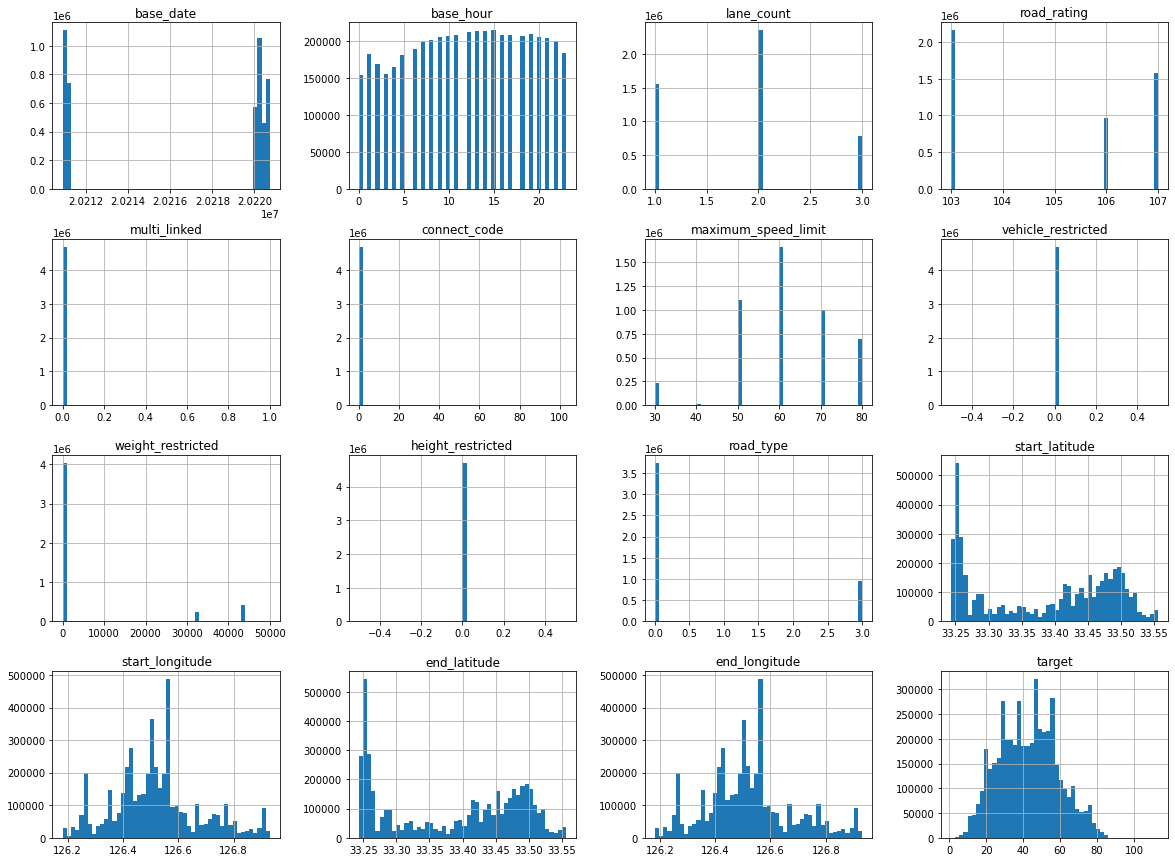

In [16]:
train.hist(bins=50, figsize=(20, 15)) 

<AxesSubplot:xlabel='start_longitude', ylabel='start_latitude'>

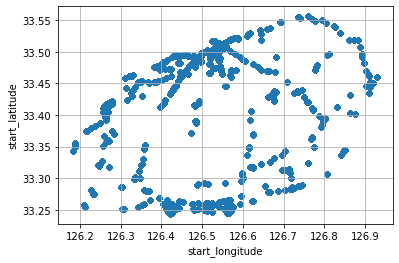

In [17]:
train.plot(kind='scatter', x='start_longitude', y='start_latitude', alpha=0.3, grid=True)

In [18]:
# map
m = folium.Map(location=[33.427747, 126.662612], zoom_start=10.4, tiles="Stamen Terrain")

tooltip = "Click me!"
a=train[['start_latitude','start_longitude','start_node_name']]
a = a.drop_duplicates()
b=a['start_longitude']
c=a['start_node_name']
a=a['start_latitude']

for i,j,k in zip(a,b,c) :
    folium.Marker([i, j], popup="{}".format(k), tooltip=tooltip).add_to(m)
m


- 3. 상관관계

In [19]:
# target 0.2이상 관계
corr = train.corr()
corr[(corr['target']>0.2)]

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
maximum_speed_limit,-0.018713,-0.036756,0.384002,-0.327474,-0.020245,-0.015190,1.000000,NaN,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715
weight_restricted,-0.011030,-0.003231,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,NaN,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092
road_type,-0.004599,-0.007880,-0.050715,-0.125618,0.042977,-0.025846,0.059511,NaN,0.792803,NaN,1.000000,-0.043420,0.033684,-0.043430,0.033664,0.200840
target,-0.033997,-0.159407,-0.144256,-0.261693,-0.008408,0.048348,0.425715,NaN,0.294092,NaN,0.200840,0.036280,-0.001168,0.036139,-0.001000,1.000000


<AxesSubplot:>

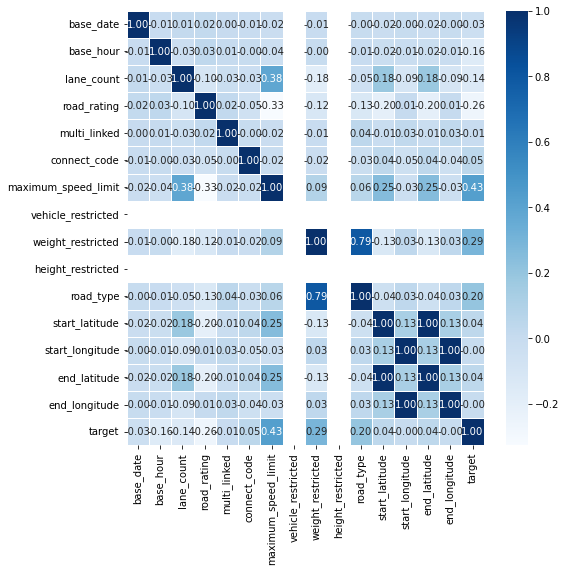

In [20]:
plt.figure(figsize=(8,8)) 
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')

- 4. 데이터 전처리와 재시각화

In [21]:
all_data = pd.concat([train,test], axis=0, ignore_index=True)
all_data

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992453,TEST_291236,20220827,토,5,1,103,일반국도16호선,0,0,80.0,...,0,월산마을,33.472819,126.463030,없음,도근교,33.470483,126.460846,없음,NaN
4992454,TEST_291237,20220819,금,20,2,103,일반국도11호선,0,0,60.0,...,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음,NaN
4992455,TEST_291238,20220805,금,11,1,107,신대로,0,0,30.0,...,0,마리나사거리,33.493624,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음,NaN
4992456,TEST_291239,20220812,금,7,2,107,경찰로,0,0,60.0,...,0,국민의료보험관리공단,33.254782,126.507014,없음,의료보험조합,33.255659,126.507333,없음,NaN


- 4-1 널 값 확인

In [23]:
all_data.isnull().sum()

id                            0
base_date                     0
day_of_week                   0
base_hour                     0
lane_count                    0
road_rating                   0
road_name                     0
multi_linked                  0
connect_code                  0
maximum_speed_limit           0
vehicle_restricted            0
weight_restricted             0
height_restricted             0
road_type                     0
start_node_name               0
start_latitude                0
start_longitude               0
start_turn_restricted         0
end_node_name                 0
end_latitude                  0
end_longitude                 0
end_turn_restricted           0
target                   291241
dtype: int64

- 4-2 중복 데이터 삭제

In [22]:
all_data = all_data.drop_duplicates()


- 4-3 데이터삭제

In [23]:
all_data=all_data.drop('height_restricted',axis=1)
all_data=all_data.drop('vehicle_restricted',axis=1)
all_data=all_data.drop('multi_linked',axis=1)

- 4-4 파생변수 생성 및 변경

In [24]:
all_data["base_date"] = pd.to_datetime(all_data["base_date"],format='%Y%m%d')
all_data['year']= all_data['base_date'].dt.year
all_data['month']= all_data['base_date'].dt.month
all_data['day']= all_data['base_date'].dt.day

- 4-5 One-hot Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

items =  ['day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted', 'end_node_name', 'end_turn_restricted']
all_data = all_data.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(all_data[i])
    all_data[i] = encoder.transform(all_data[i])

all_data


,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,connect_code,maximum_speed_limit,weight_restricted,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day
0,TRAIN_0000000,2022-06-23,1,17,1,106,46,0,60.0,32400.0,...,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23
1,TRAIN_0000001,2022-07-28,1,21,2,103,34,0,60.0,0.0,...,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28
2,TRAIN_0000002,2021-10-10,4,7,2,103,36,0,80.0,0.0,...,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10
3,TRAIN_0000003,2022-03-11,0,13,2,107,57,0,50.0,0.0,...,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11
4,TRAIN_0000004,2021-10-05,6,8,2,103,35,0,80.0,0.0,...,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992453,TEST_291236,2022-08-27,5,5,1,103,36,0,80.0,0.0,...,126.463030,0,90,33.470483,126.460846,0,NaN,2022,8,27
4992454,TEST_291237,2022-08-19,0,20,2,103,34,0,60.0,0.0,...,126.598914,0,451,33.300796,126.600332,0,NaN,2022,8,19
4992455,TEST_291238,2022-08-05,0,11,1,107,23,0,30.0,0.0,...,126.496769,1,437,33.497500,126.496946,1,NaN,2022,8,5
4992456,TEST_291239,2022-08-12,0,7,2,107,1,0,60.0,0.0,...,126.507014,0,346,33.255659,126.507333,0,NaN,2022,8,12


### 데이터 전처리하기

In [27]:
# 칼럼 'slot' 추가
# 시간대 4분할 하여 0,1,2,3 으로 나누기
def time(x) :
    if x>=0 and x<=6 : # 00시~06시 = 0
        return 0
    elif x>=7 and x<=12: # 06시~12시 = 1
        return 1
    elif x>=13 and x<=18: # 12시~18시 = 2
        return 2
    elif x>=19 and x<=23: # 18시~24시 = 3
        return 3
all_data['slot']=all_data.base_hour.apply(time)


In [28]:
# 칼럼 'hoilday' 추가
# 주말 4,5 는 1로 표시 평일 0,1,2,3,6 은 0 으로 표시
def dddd(x) :
    if x>=4 and x<=5 :
        return 1
    else:
        return 0
all_data['hoilday']=all_data.day_of_week.apply(dddd)


In [29]:
# 칼럼 'distance' 추가
# 경도 위도 거리 구하기
all_data['distance']=((all_data.start_latitude-all_data.end_latitude)**2 + (all_data.start_longitude-all_data.end_longitude)**2)**(1/2)
all_data

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,connect_code,maximum_speed_limit,weight_restricted,...,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,slot,hoilday,distance
0,TRAIN_0000000,2022-06-23,1,17,1,106,46,0,60.0,32400.0,...,33.427749,126.662335,0,52.0,2022,6,23,2,0,0.000277
1,TRAIN_0000001,2022-07-28,1,21,2,103,34,0,60.0,0.0,...,33.504811,126.526240,0,30.0,2022,7,28,3,0,0.004987
2,TRAIN_0000002,2021-10-10,4,7,2,103,36,0,80.0,0.0,...,33.280072,126.362147,0,61.0,2021,10,10,1,1,0.006516
3,TRAIN_0000003,2022-03-11,0,13,2,107,57,0,50.0,0.0,...,33.245565,126.566228,0,20.0,2022,3,11,2,0,0.001104
4,TRAIN_0000004,2021-10-05,6,8,2,103,35,0,80.0,0.0,...,33.462677,126.330152,0,38.0,2021,10,5,1,0,0.003630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992453,TEST_291236,2022-08-27,5,5,1,103,36,0,80.0,0.0,...,33.470483,126.460846,0,NaN,2022,8,27,0,1,0.003197
4992454,TEST_291237,2022-08-19,0,20,2,103,34,0,60.0,0.0,...,33.300796,126.600332,0,NaN,2022,8,19,3,0,0.004778
4992455,TEST_291238,2022-08-05,0,11,1,107,23,0,30.0,0.0,...,33.497500,126.496946,1,NaN,2022,8,5,1,0,0.003880
4992456,TEST_291239,2022-08-12,0,7,2,107,1,0,60.0,0.0,...,33.255659,126.507333,0,NaN,2022,8,12,1,0,0.000933


In [ ]:
train['road_rating'].value_counts()

- 상관관계

In [81]:
train['road_name'].value_counts()

35    1046092
0      569463
36     554510
37     248181
34     215701
       ...   
26       7718
25       7342
8        6813
60       2819
59        587
Name: road_name, Length: 61, dtype: int64

In [69]:
corr = train.corr()
corr

,day_of_week,base_hour,lane_count,road_rating,road_name,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,...,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,slot,hoilday,distance
day_of_week,1.000000,0.004889,0.001426,-0.002274,0.001307,-0.000002,0.001651,0.000158,0.000429,0.000105,...,0.001214,0.000664,0.000949,0.006397,0.037503,-0.047578,0.013611,0.003279,0.478516,0.000411
base_hour,0.004889,1.000000,-0.029194,0.031658,-0.029342,-0.002649,-0.036756,-0.003231,-0.007880,0.004755,...,-0.021597,-0.011489,-0.012589,-0.159407,-0.008213,0.001738,0.008077,0.965466,0.009305,0.002591
lane_count,0.001426,-0.029194,1.000000,-0.095717,-0.007497,-0.029290,0.384002,-0.177224,-0.050715,-0.061337,...,0.182330,-0.094732,0.312854,-0.144256,0.010402,0.003799,-0.001085,-0.028016,0.001696,-0.161261
road_rating,-0.002274,0.031658,-0.095717,1.000000,-0.353247,-0.054160,-0.327474,-0.118630,-0.125618,-0.024628,...,-0.204843,0.007386,-0.029451,-0.261693,0.017585,-0.003700,0.001480,0.031331,-0.001793,0.050926
road_name,0.001307,-0.029342,-0.007497,-0.353247,1.000000,0.012323,0.143490,0.039103,0.100424,0.013173,...,0.061585,0.136035,0.023933,0.116778,-0.003605,0.000905,-0.000947,-0.029140,0.000569,0.044752
connect_code,-0.000002,-0.002649,-0.029290,-0.054160,0.012323,1.000000,-0.015190,-0.020491,-0.025846,0.015321,...,0.037163,-0.044853,-0.016791,0.048348,-0.010311,0.005092,-0.000767,-0.002551,0.000078,-0.006343
maximum_speed_limit,0.001651,-0.036756,0.384002,-0.327474,0.143490,-0.015190,1.000000,0.085080,0.059511,-0.031340,...,0.252958,-0.032907,0.104737,0.425715,-0.017561,0.001396,-0.001759,-0.036065,0.000892,0.059490
weight_restricted,0.000158,-0.003231,-0.177224,-0.118630,0.039103,-0.020491,0.085080,1.000000,0.792803,0.084426,...,-0.128305,0.034915,-0.119564,0.294092,-0.010346,0.000740,-0.000207,-0.003467,0.000215,-0.278511
road_type,0.000429,-0.007880,-0.050715,-0.125618,0.100424,-0.025846,0.059511,0.792803,1.000000,0.052607,...,-0.043430,0.033664,-0.103781,0.200840,-0.004586,0.003837,-0.000432,-0.008006,0.000896,-0.316324
start_node_name,0.000105,0.004755,-0.061337,-0.024628,0.013173,0.015321,-0.031340,0.084426,0.052607,1.000000,...,-0.035139,0.058852,0.004197,0.029007,0.002123,0.001407,-0.000010,0.004641,0.000463,-0.021570


- 4-6 데이터 나누기

In [67]:
test=all_data[np.isnan(all_data['target'])]
train=all_data[~np.isnan(all_data['target'])]

- 4-7 전처리 후 재시각화

<AxesSubplot:>

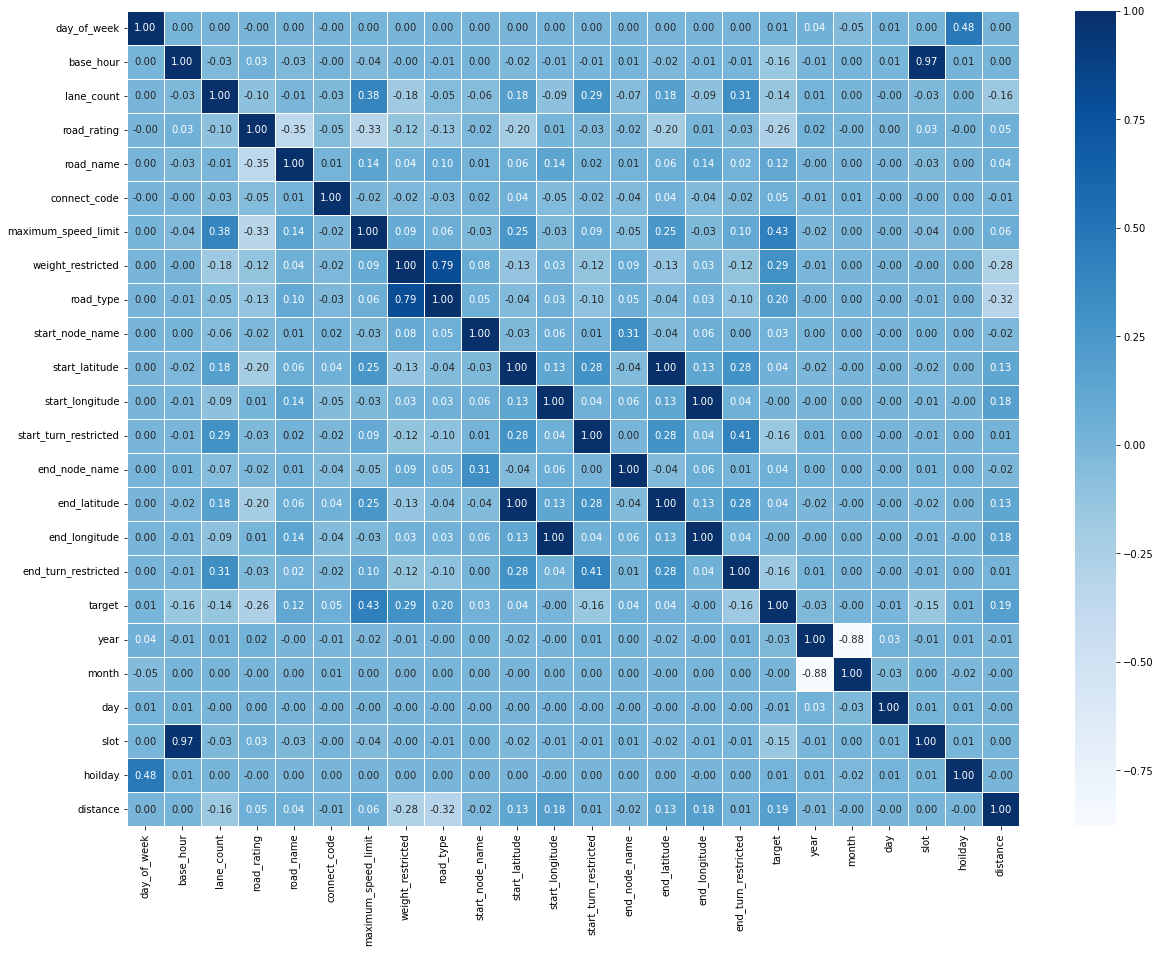

In [71]:
plt.figure(figsize=(20,15)) 
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')

<AxesSubplot:xlabel='target', ylabel='Density'>

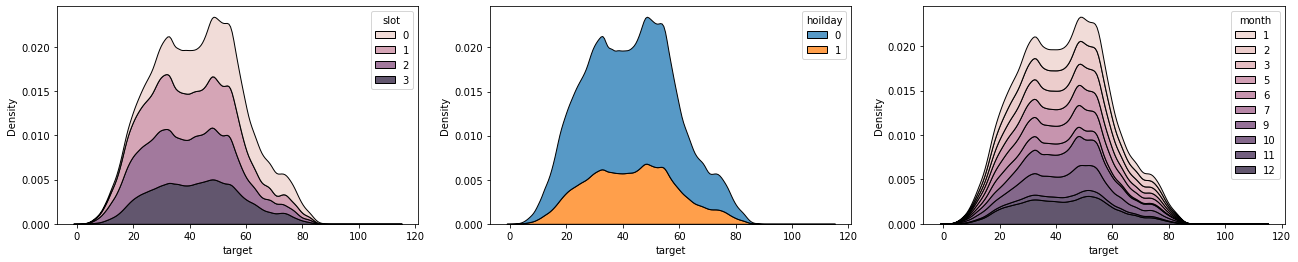

In [73]:
# 시간대별(slot), 휴일별(holiday) ,월별(month) 평균속도(target) 차이 
cat_columns = ["slot", "hoilday",'month']

figrue, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(22, 4))

sns.kdeplot(data=train, x='target', hue='slot', multiple='stack',ax=axes[0])
sns.kdeplot(data=train, x='target', hue='hoilday', multiple='stack',ax=axes[1])
sns.kdeplot(data=train, x='target', hue='month', multiple='stack',ax=axes[2])

In [ ]:
# 차로수별("lane_count"),차로등급별('road_rating') 평균속도
cat_columns1 = ["lane_count", "road_rating",'month']

figrue, axes = plt.subplots(nrows=1, ncols=len(cat_columns1), figsize=(22, 4))

sns.kdeplot(data=train, x="target", y="lane_count", multiple='stack',ax=axes[0])
sns.kdeplot(data=train, x='target', hue='road_rating', multiple='stack',ax=axes[1])

plt.show([0,1000])

array([[<AxesSubplot:title={'center':'base_date'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'base_hour'}>,
        <AxesSubplot:title={'center':'lane_count'}>,
        <AxesSubplot:title={'center':'road_rating'}>],
       [<AxesSubplot:title={'center':'road_name'}>,
        <AxesSubplot:title={'center':'connect_code'}>,
        <AxesSubplot:title={'center':'maximum_speed_limit'}>,
        <AxesSubplot:title={'center':'weight_restricted'}>,
        <AxesSubplot:title={'center':'road_type'}>],
       [<AxesSubplot:title={'center':'start_node_name'}>,
        <AxesSubplot:title={'center':'start_latitude'}>,
        <AxesSubplot:title={'center':'start_longitude'}>,
        <AxesSubplot:title={'center':'start_turn_restricted'}>,
        <AxesSubplot:title={'center':'end_node_name'}>],
       [<AxesSubplot:title={'center':'end_latitude'}>,
        <AxesSubplot:title={'center':'end_longitude'}>,
        <AxesSubplot:title={'center':'end_turn_

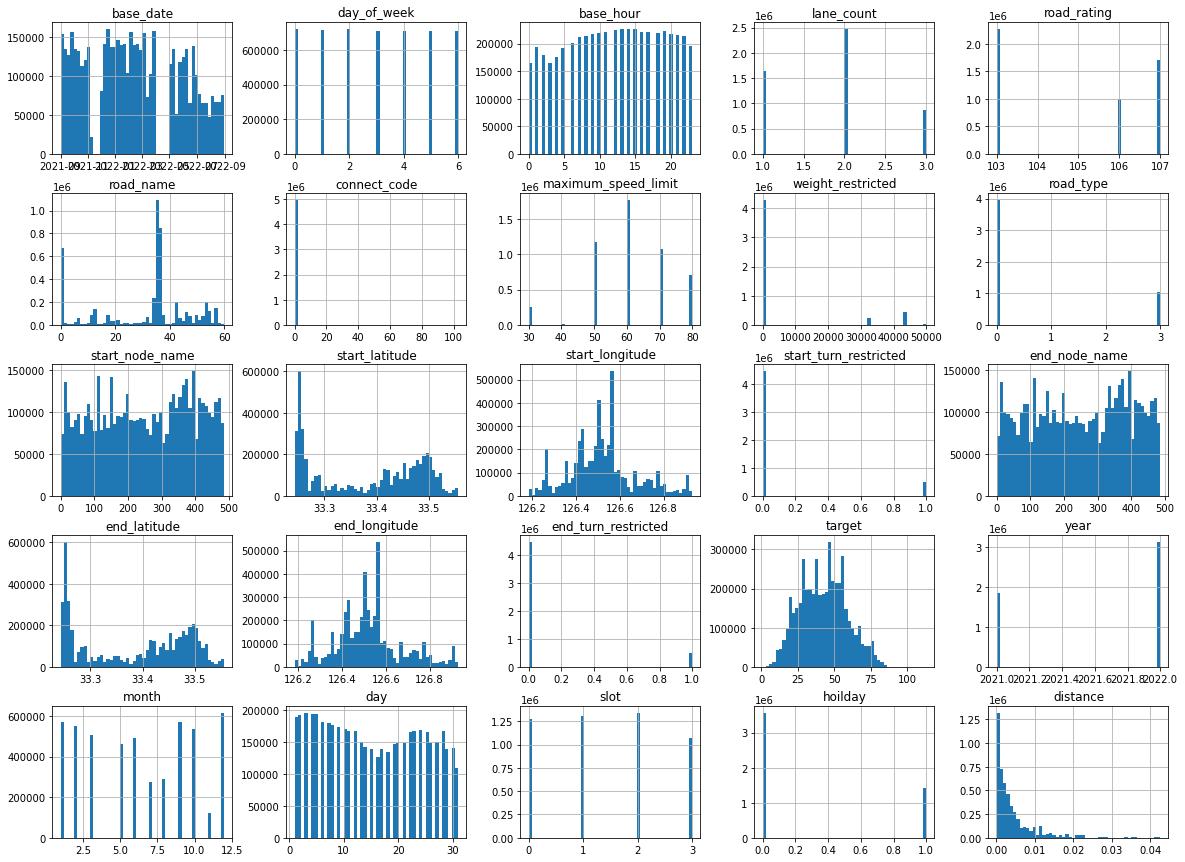

In [40]:
all_data.hist(bins=50, figsize=(20, 15)) 

- 연속데이터 산점도

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

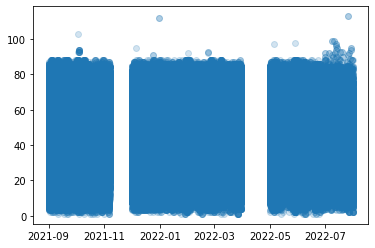

In [75]:
sns.regplot(data=train, x='base_date', y='target',scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})

- 범주형 데이터 산점도

ValueError: Could not interpret input 'multi_linked'

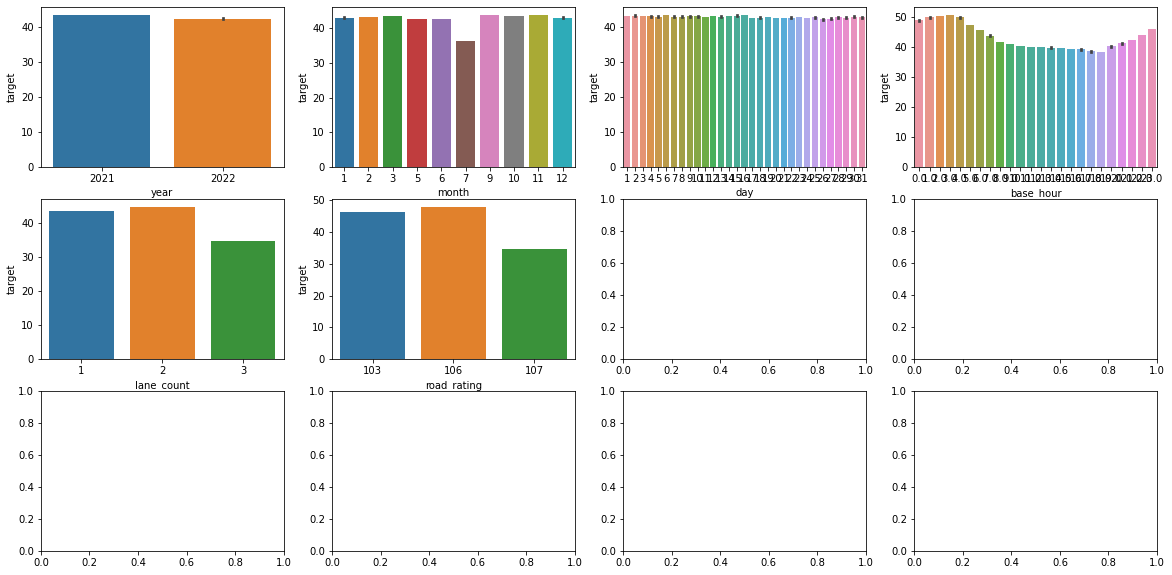

In [77]:
figure, axes = plt.subplots(3,4)
figure.set_size_inches(20, 10)
sns.barplot(data=train, x='year', y='target',ax=axes[0][0])
sns.barplot(data=train, x='month', y='target',ax=axes[0][1])
sns.barplot(data=train, x='day', y='target',ax=axes[0][2])
sns.barplot(data=train, x='base_hour', y='target',ax=axes[0][3])
sns.barplot(data=train, x='lane_count', y='target',ax=axes[1][0])
sns.barplot(data=train, x='road_rating', y='target',ax=axes[1][1])
sns.barplot(data=train, x='multi_linked', y='target',ax=axes[1][2])
sns.barplot(data=train, x='connect_code', y='target',ax=axes[1][3])
sns.barplot(data=train, x='maximum_speed_limit', y='target',ax=axes[2][0])
sns.barplot(data=train, x='road_type', y='target',ax=axes[2][1])
sns.barplot(data=train, x='start_turn_restricted', y='target',ax=axes[2][2])
sns.barplot(data=train, x='end_turn_restricted', y='target',ax=axes[2][3])


plt.show()

- 시간, 월별 추가정보

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=2)
sns.pointplot(data=train, x="base_hour", y="target", ax=ax1)
sns.pointplot(data=train, x="month", y="target", ax=ax2)

- 18일과 7월에 정체가 더 심화됨을 알 수 있다.

In [ ]:
#from sklearn.preprocessing import LabelEncoder

#items =  ['day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted', 'end_node_name', 'end_turn_restricted']
#train = train.copy()
#encoder = LabelEncoder()

#for i in items:
#    encoder = LabelEncoder()
#    encoder.fit(train[i])
#    train[i] = encoder.transform(train[i])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = train.drop(['id','multi_linked', 'target','height_restricted', 'connect_code', 'vehicle_restricted'], axis=1)
y = train['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### 5. 베이스라인 모델

### LR (선형)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
lin_reg_rmse = np.sqrt((-scores).mean())
lin_reg_rmse


### DTR (트리)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)

tree_rmse = np.sqrt(-tree_scores).mean()
tree_rmse


### Ridge(릿지)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
from sklearn.model_selection import GridSearchCV

In [ ]:
# 평가지표 계산 함수
from sklearn.metrics import make_scorer
# log 값 변환 시 언더플로우 영향으로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred, convertExp=True):
    if convertExp:
        y = np.expm1(y)
        pred = np.expm1(pred)
    
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [ ]:
# 릿지모델
ridge = Ridge()
ridge_params = {'alpha' : [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]} # 14개
gridsearch_ridge = GridSearchCV(ridge, ridge_params, scoring=rmsle_scorer, cv=5, n_jobs=-1) # 14 * 5

In [ ]:
%time gridsearch_ridge.fit(X_train, y_train)

In [ ]:
gridsearch_ridge.best_params_

In [ ]:
cvres = gridsearch_ridge.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params) # rmsle와 그 때의 하이퍼 파라미터


### Ensemble(앙상블)

### Baggig(배깅)

In [ ]:
from sklearn.ensemble import BaggingRegressor


In [ ]:
bag = BaggingRegressor(LinearRegression())

bag_params = {'n_estimators':[300,500,700,1000],'max_samples':[100,200,300]}

gridsearch_bag = GridSearchCV(bag,bag_params,scoring='neg_mean_absolute_error'
                                 ,cv= 5,n_jobs=-1)
gridsearch_bag.fit(X_train,y_train)


In [ ]:
GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=LinearRegression()),
             n_jobs=-1,
             param_grid={'max_samples': [100, 200, 300],
                         'n_estimators': [300, 500, 700, 1000]},
             scoring='neg_mean_absolute_error')

In [ ]:
cvres = gridsearch_bag.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params) # rmsle와 그 때의 하이퍼 파라미터

### RFR(랜덤포레스트)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_scores = cross_val_score(rf_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=2, n_jobs=-1)

rf_rmse = np.sqrt(-rf_scores).mean()
rf_rmse


### 그레디언트 부스팅 모델

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbrt_params = { 'learning_rate' : [0.01, 0.02, 0.03, 0.04],
               'n_estimators' : [1000, 1500],
               'subsample' : [0.9, 0.5, 0.2],
               'max_depth' : [2, 4, 6, 8]
    
}

gbrt = GradientBoostingRegressor()

gridsearch_gbrt = GridSearchCV(gbrt, gbrt_params, scoring=rmsle_scorer, cv=5, n_jobs=-1)

In [ ]:
%time gridsearch_gbrt.fit(X_train, y_train)


In [ ]:
cvres = gridsearch_gbrt.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params)


### 6. 성능향상